# Imoprting Libararies & Data

In [1]:
# importing the Rquired Libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing Dataset
df=pd.read_csv(r"C:\Users\ASUS\Desktop\projects\BMW sales data (2010-2024) (1).csv")

In [3]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
df.shape

(50000, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


# Data Cleaning & Preparation

In [6]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [9]:
df.nunique()

Model                      11
Year                       15
Region                      6
Color                       6
Fuel_Type                   4
Transmission                2
Engine_Size_L              36
Mileage_KM              44347
Price_USD               38246
Sales_Volume             9845
Sales_Classification        2
dtype: int64

In [10]:
df['Color'].unique()

array(['Red', 'Blue', 'Black', 'Silver', 'White', 'Grey'], dtype=object)

In [11]:
df['Fuel_Type'].unique

<bound method Series.unique of 0          Petrol
1          Hybrid
2          Petrol
3          Petrol
4          Diesel
           ...   
49995      Hybrid
49996    Electric
49997      Petrol
49998    Electric
49999      Diesel
Name: Fuel_Type, Length: 50000, dtype: object>

In [12]:
# Creating new column for Revenue
df['Revenue']=df['Sales_Volume']*df['Price_USD']

In [13]:
df.head(3)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Revenue
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,819542000
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,271562732
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,792175410


<Figure size 1000x600 with 0 Axes>

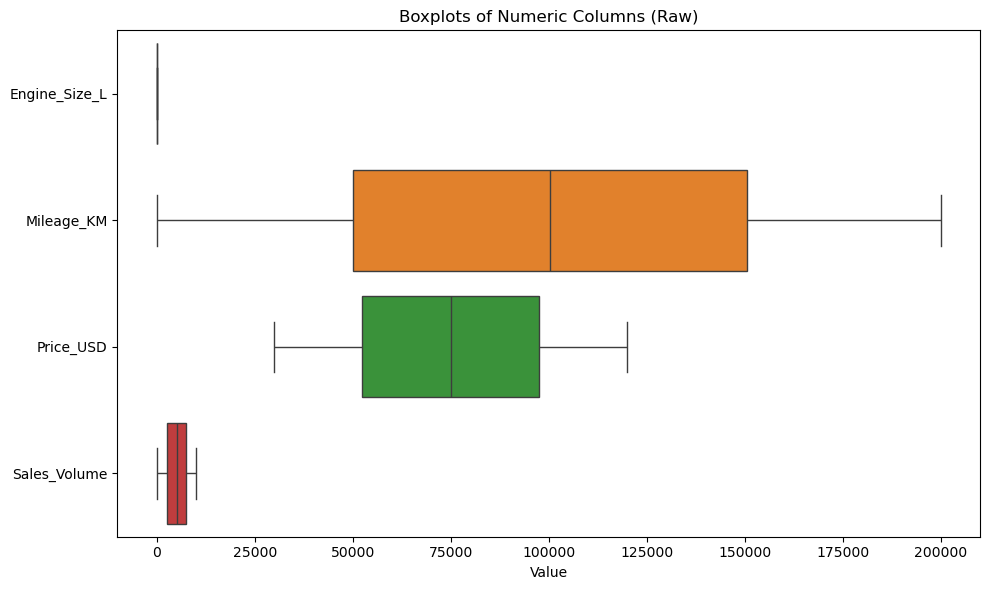

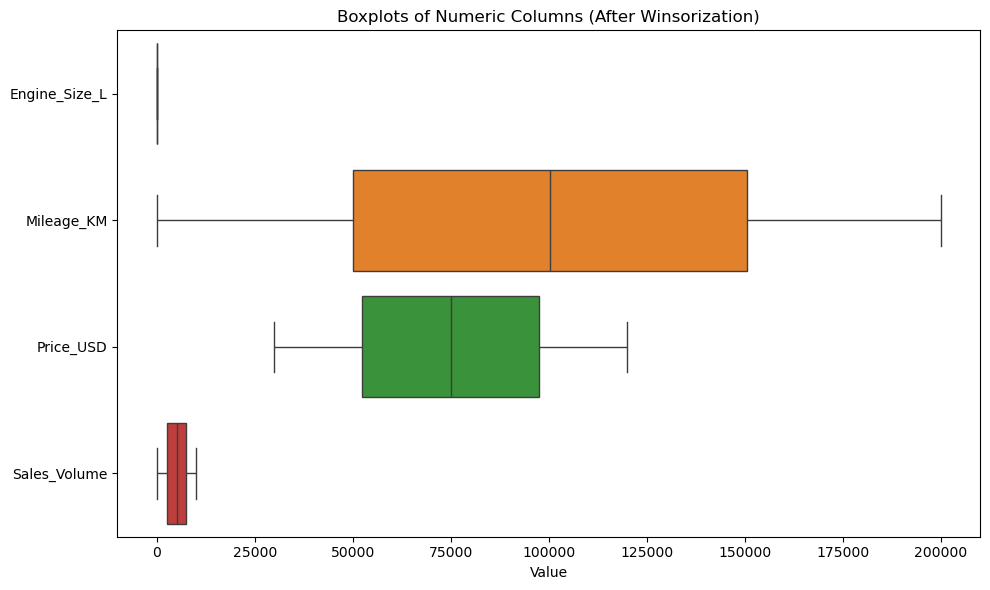

Rendered boxplots for raw and cleaned numeric columns.


In [15]:
# If cleaned not built yet, create it using the same IQR winsorization by Region-Year
numeric_cols = ['Engine_Size_L','Mileage_KM','Price_USD','Sales_Volume']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

try:
    clean
except NameError:
    key = ['Region','Year']
    metrics = ['Price_USD','Mileage_KM']
    caps = {}
    for m in metrics:
        grp = df.groupby(key)[m]
        q1 = grp.quantile(0.25)
        q3 = grp.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        caps[m] = pd.DataFrame({'lower':lower, 'upper':upper})
    def winsorize_series(s, m):
        idx = pd.MultiIndex.from_frame(df[key])
        bounds = caps[m].reindex(idx)
        lower = bounds['lower'].values
        upper = bounds['upper'].values
        x = s.values.copy()
        x = np.where(~np.isnan(x) & (x < lower), lower, x)
        x = np.where(~np.isnan(x) & (x > upper), upper, x)
        return pd.Series(x, index=s.index)
    clean = df.copy()
    for m in metrics:
        clean[m] = winsorize_series(df[m], m)

# Boxplot for raw numeric columns
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title('Boxplots of Numeric Columns (Raw)')
plt.xlabel('Value')
plt.tight_layout()
plt.show()

# Boxplot for cleaned numeric columns
plt.figure(figsize=(10,6))
sns.boxplot(data=clean[numeric_cols], orient='h')
plt.title('Boxplots of Numeric Columns (After Winsorization)')
plt.xlabel('Value')
plt.tight_layout()
plt.show()

print('Rendered boxplots for raw and cleaned numeric columns.')

# 📊 Trend Analysis

## Q.1 How have BMW’s total sales evolved from 2010 to 2024?

   Year  Sales_Volume
0  2010      16933445
1  2011      16758941
2  2012      16751895
3  2013      16866733
4  2014      16958960


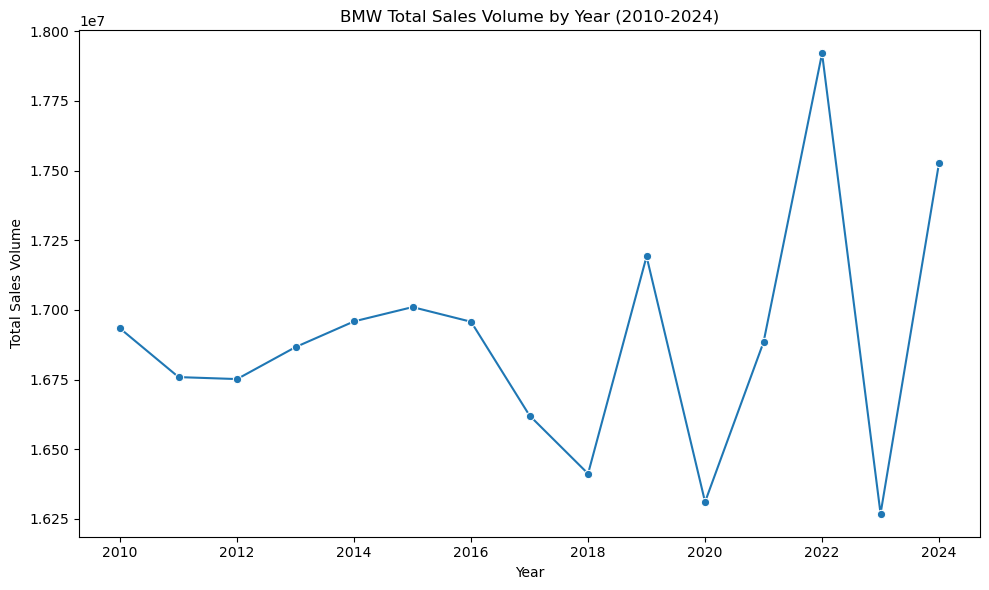

Aggregated and plotted total Sales_Volume by Year for 2010-2024.


In [16]:
# Ensure numeric
df['Sales_Volume'] = pd.to_numeric(df['Sales_Volume'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Aggregate total sales by year
sales_by_year = df.groupby('Year', as_index=False)['Sales_Volume'].sum().sort_values('Year')

print(sales_by_year.head())

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=sales_by_year, x='Year', y='Sales_Volume', marker='o')
plt.title('BMW Total Sales Volume by Year (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.tight_layout()
plt.savefig('my_chart1.png', dpi=200, bbox_inches='tight')
plt.show()
print('Aggregated and plotted total Sales_Volume by Year for 2010-2024.')

## Q. 2 Which years show exceptional growth or decline?

In [17]:
df['Sales_Volume'] = pd.to_numeric(df['Sales_Volume'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

sales_by_year = df.groupby('Year', as_index=False)['Sales_Volume'].sum().sort_values('Year')
sales_by_year['YoY_Change'] = sales_by_year['Sales_Volume'].pct_change() * 100.0

# Define exceptional as outside +/- 1.5 * IQR of YoY changes (excluding first NaN)
chg = sales_by_year['YoY_Change'].dropna()
q1 = chg.quantile(0.25)
q3 = chg.quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
sales_by_year['Exceptional'] = (sales_by_year['YoY_Change'] < lower) | (sales_by_year['YoY_Change'] > upper)
print(sales_by_year.head())
print('Computed YoY changes, flagged exceptional years using IQR, and plotted with annotations.')

   Year  Sales_Volume  YoY_Change  Exceptional
0  2010      16933445         NaN        False
1  2011      16758941   -1.030529        False
2  2012      16751895   -0.042043        False
3  2013      16866733    0.685522        False
4  2014      16958960    0.546798        False
Computed YoY changes, flagged exceptional years using IQR, and plotted with annotations.


## Geographical Insights

# Q.3 Which  regions contribute most to total sales?

          Region  Sales_Volume
1           Asia      42974277
2         Europe      42555138
4  North America      42402629
3    Middle East      42326620
0         Africa      41565252


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27124\3428152585.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_totals.head(10), x='Sales_Volume', y='Region', palette='Blues_r')


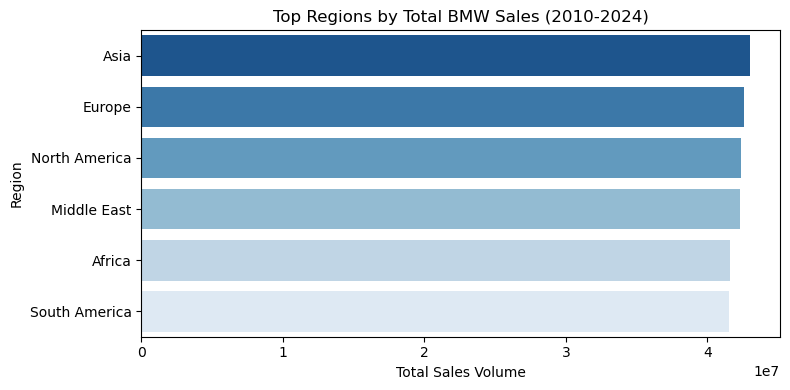

Computed total sales by region and plotted top regions.


In [18]:
# Aggregate total sales by Region and show head + a simple bar chart of top regions
# This answers which regions contribute most to total sales across the dataset.
df['Sales_Volume'] = pd.to_numeric(df['Sales_Volume'], errors='coerce')
region_totals = df.groupby('Region', as_index=False)['Sales_Volume'].sum().sort_values('Sales_Volume', ascending=False)
print(region_totals.head())

plt.figure(figsize=(8,4))
sns.barplot(data=region_totals.head(10), x='Sales_Volume', y='Region', palette='Blues_r')
plt.title('Top Regions by Total BMW Sales (2010-2024)')
plt.xlabel('Total Sales Volume')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

print('Computed total sales by region and plotted top regions.')

# Q.4 Are there emerging markets showing rapid sales growth?

   Region  Year  Sales_Volume
0  Africa  2010       2855044
1  Africa  2011       2760743
2  Africa  2012       2670105
3  Africa  2013       2848852
4  Africa  2014       2743718
          Region  CAGR_Recent_%
1           Asia       2.571084
3    Middle East       2.080686
0         Africa       0.395473
5  South America      -0.388150
2         Europe      -0.415734
4  North America      -1.694024


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27124\3390520713.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cagr_recent = reg_year.groupby('Region').apply(recent_cagr).reset_index(name='CAGR_Recent_%')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27124\3390520713.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='CAGR_Recent_%', y='Region', palette='Greens')


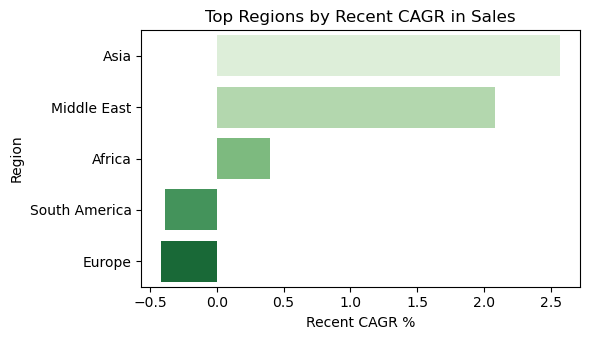

          Region  CAGR_Recent_%  Positive_YoY_Last3yrs
0           Asia       2.571084                  False
1    Middle East       2.080686                  False
2         Africa       0.395473                  False
3  South America      -0.388150                  False
4         Europe      -0.415734                  False
5  North America      -1.694024                  False
Computed regional YoY%, recent CAGR, and consistency; displayed head, rankings, and chart.


In [19]:
# Identify emerging markets with rapid sales growth by computing regional YoY% and recent CAGR.
# Show head of regional-by-year table and a plot of top CAGR regions.
# Clean types
df['Sales_Volume'] = pd.to_numeric(df['Sales_Volume'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Regional totals by year
reg_year = df.groupby(['Region','Year'], as_index=False)['Sales_Volume'].sum()
reg_year = reg_year.sort_values(['Region','Year'])
print(reg_year.head())

# Compute YoY% by region
reg_year['YoY_pct'] = reg_year.groupby('Region')['Sales_Volume'].pct_change() * 100.0

# Compute recent CAGR over last 5 years available per region
def recent_cagr(group):
    g = group.sort_values('Year')
    if len(g) < 2:
        return np.nan
    last_year = g['Year'].max()
    first_year = max(last_year - 5, g['Year'].min())
    gwin = g[(g['Year'] >= first_year) & (g['Year'] <= last_year)]
    if gwin['Sales_Volume'].iloc[0] in [0, np.nan] or gwin['Sales_Volume'].iloc[0] == 0:
        return np.nan
    n = int(gwin['Year'].iloc[-1] - gwin['Year'].iloc[0])
    if n <= 0:
        return np.nan
    cagr = (gwin['Sales_Volume'].iloc[-1] / gwin['Sales_Volume'].iloc[0]) ** (1.0 / n) - 1.0
    return cagr * 100.0

cagr_recent = reg_year.groupby('Region').apply(recent_cagr).reset_index(name='CAGR_Recent_%')

# Rank regions by CAGR and show top
cagr_ranked = cagr_recent.sort_values('CAGR_Recent_%', ascending=False)
print(cagr_ranked.head(10))

# Plot top 5 regions by recent CAGR
top5 = cagr_ranked.head(5)
plt.figure(figsize=(6,3.5))
sns.barplot(data=top5, x='CAGR_Recent_%', y='Region', palette='Greens')
plt.title('Top Regions by Recent CAGR in Sales')
plt.xlabel('Recent CAGR %')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

# Also list regions with consistently positive YoY in last 3 years
last_year = reg_year['Year'].max()
recent3 = reg_year[reg_year['Year'] >= last_year - 3]
pos_consistent = recent3.groupby('Region')['YoY_pct'].apply(lambda s: (s.dropna() > 0).all()).reset_index(name='Positive_YoY_Last3yrs')
summary = cagr_ranked.merge(pos_consistent, on='Region', how='left')
print(summary.head(10))

print('Computed regional YoY%, recent CAGR, and consistency; displayed head, rankings, and chart.')

## Q.5 How has the demand for electric/hybrid models evolved since 2015?)?

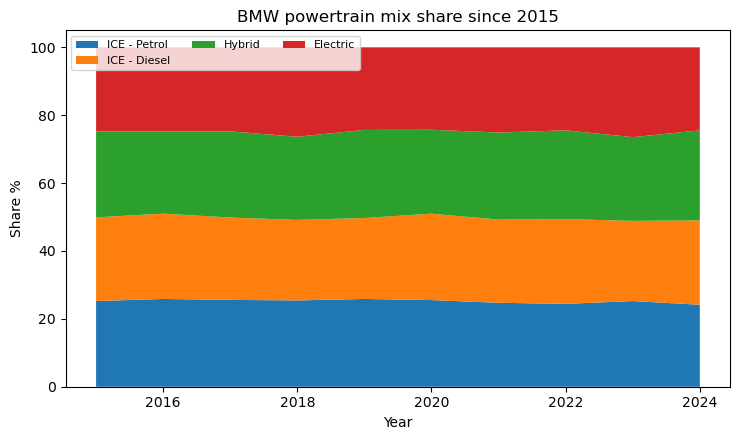

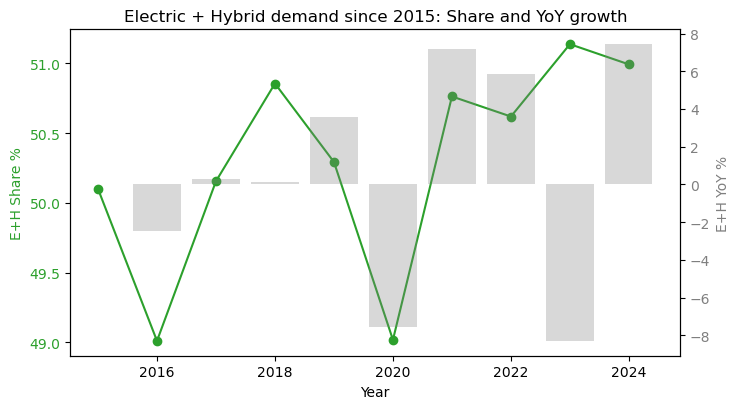

Fixed plotting and displayed two charts for powertrain mix and E+H trajectory.


In [20]:
# The previous cell failed before plotting due to invalid list construction with 'intersect'.
# We'll rebuild the plot properly: stacked area of powertrain shares and a line for E+H share.

for col in ['Year','Sales_Volume']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
def bucket_fuel(x):
        x_str = str(x).strip().lower()
        if x_str in ['electric','ev','bev']:
            return 'Electric'
        if x_str in ['hybrid','phev','hev','plug-in hybrid','plugin hybrid']:
            return 'Hybrid'
        if x_str in ['diesel']:
            return 'ICE - Diesel'
        if x_str in ['petrol','gasoline','gas']:
            return 'ICE - Petrol'
        return 'Other/Unknown'
bmw = df.copy()
bmw['Powertrain'] = bmw['Fuel_Type'].apply(bucket_fuel)
pt_year = bmw.groupby(['Year','Powertrain'], as_index=False)['Sales_Volume'].sum()
pt_year = pt_year[pt_year['Year'] >= 2015]
totals = pt_year.groupby('Year', as_index=False)['Sales_Volume'].sum().rename(columns={'Sales_Volume':'Total_Year'})
pt_year = pt_year.merge(totals, on='Year', how='left')
pt_year['Share_%'] = pt_year['Sales_Volume'] / pt_year['Total_Year'] * 100.0
eh = pt_year[pt_year['Powertrain'].isin(['Electric','Hybrid'])].groupby('Year', as_index=False)['Sales_Volume'].sum().rename(columns={'Sales_Volume':'E_H_Volume'})
eh = eh.merge(totals, on='Year', how='left')
eh = eh.sort_values('Year')
eh['E_H_Share_%'] = eh['E_H_Volume'] / eh['Total_Year'] * 100.0
eh['YoY_%'] = eh['E_H_Volume'].pct_change() * 100.0

# Build pivot for shares
pt_pivot = pt_year.pivot(index='Year', columns='Powertrain', values='Share_%').fillna(0.0)
# Ensure a consistent ordered list of columns that exist
order_cols = [c for c in ['ICE - Petrol','ICE - Diesel','Hybrid','Electric','Other/Unknown'] if c in pt_pivot.columns]
pt_pivot = pt_pivot[order_cols]

# Plot stacked area of powertrain shares
plt.figure(figsize=(7.5,4.5))
plt.stackplot(pt_pivot.index.values, [pt_pivot[c].values for c in order_cols], labels=order_cols)
plt.legend(loc='upper left', ncol=3, fontsize=8)
plt.title('BMW powertrain mix share since 2015')
plt.xlabel('Year')
plt.ylabel('Share %')
plt.tight_layout()
plt.show()

# Plot E+H share and YoY on a second chart
fig, ax1 = plt.subplots(figsize=(7.5,4.2))
ax1.plot(eh['Year'].values, eh['E_H_Share_%'].values, marker='o', color='tab:green', label='E+H Share %')
ax1.set_xlabel('Year')
ax1.set_ylabel('E+H Share %', color='tab:green')
for tl in ax1.get_yticklabels():
    tl.set_color('tab:green')
ax2 = ax1.twinx()
ax2.bar(eh['Year'].values, eh['YoY_%'].values, color='tab:gray', alpha=0.3, label='E+H YoY %')
ax2.set_ylabel('E+H YoY %', color='tab:gray')
for tl in ax2.get_yticklabels():
    tl.set_color('tab:gray')
plt.title('Electric + Hybrid demand since 2015: Share and YoY growth')
fig.tight_layout()
plt.show()

print('Fixed plotting and displayed two charts for powertrain mix and E+H trajectory.')